In [1]:
import pandas as pd
import numpy as np

In [511]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [512]:
train.head(2)

,Unnamed: 0,rating,bitter,meaty,piquant,salty,sour,sweet,ingredientcount,numberofservings,...,yolks,yoplait,york,yukon,za,zest,zesty,ziti,zucchini,course_num
0,0,3,0.166667,0.166667,0.0,0.500000,0.833333,0.333333,11,12.0,...,0.0,0.0,0.0,0.0,0.0,0.234578,0.0,0.0,0.000000,3
1,1,4,0.166667,0.166667,0.0,0.166667,0.500000,0.166667,7,5.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.337091,4


In [513]:
test.head(2)

,Unnamed: 0,rating,bitter,meaty,piquant,salty,sour,sweet,ingredientcount,numberofservings,...,yolks,yoplait,york,yukon,za,zest,zesty,ziti,zucchini,course_num
0,0,3,NaN,NaN,NaN,NaN,NaN,NaN,7,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,1,4,0.333333,0.833333,0.5,0.666667,0.166667,0.166667,23,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [515]:
train = train.drop(['Unnamed: 0'], axis = 1 )
test = test.drop(['Unnamed: 0'], axis = 1 )
print train.shape
print test.shape

(7508, 1824)
(2503, 1824)


In [516]:
# fill na with zero
train = train.fillna(value = 0)
test = test.fillna(value = 0)

In [517]:
train.head(2)

,rating,bitter,meaty,piquant,salty,sour,sweet,ingredientcount,numberofservings,totaltimeinseconds,...,yolks,yoplait,york,yukon,za,zest,zesty,ziti,zucchini,course_num
0,3,0.166667,0.166667,0.0,0.500000,0.833333,0.333333,11,12.0,900.0,...,0.0,0.0,0.0,0.0,0.0,0.234578,0.0,0.0,0.000000,3
1,4,0.166667,0.166667,0.0,0.166667,0.500000,0.166667,7,5.0,2100.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.337091,4


In [518]:
# define X and Y 

#training set
array = train.values
print array.shape
X_train = array[:, 0:1823]
print X_train.shape
Y_train = array[:, 1823]
print Y_train.shape

#testing set
_array = test.values
X_test = _array[:, 0:1823]
print X_test.shape
Y_test = _array[:, 1823]
print Y_test.shape

(7508, 1824)
(7508, 1823)
(7508,)
(2503, 1823)
(2503,)


In [497]:
X_train = np.array(X_train).astype(int)
Y_train = np.array(Y_train).astype(int)

In [519]:
# select models to test on dataset
#import library
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeCV

models=[]
models.append(('LOG', LogisticRegression()))
#models.append(('Ridge', Ridge()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))

In [524]:
from sklearn import cross_validation
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

results=[]
names=[]

for name, model in models:
    kfold = KFold(n = 7508, n_folds = 10, random_state = 10)
    _results = cross_validation.cross_val_score(model, X_train, Y_train, cv = kfold, scoring = 'accuracy')
    results.append(_results)
    names.append(name)
    scores="%s: %f (%f)" % (name, _results.mean(), _results.std())
    print scores

LOG: 0.848162 (0.015135)
LDA: 0.851487 (0.010987)
CART: 0.763451 (0.010706)
KNN: 0.463108 (0.010651)
NB: 0.520506 (0.069723)


In [523]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))


In [526]:
results=[]
names=[]
for name, model in ensembles:
    kfold=KFold(n=7508,n_folds=10, random_state=10)
    _results=cross_validation.cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
    results.append(_results)
    names.append(name)
    scores="%s: %f (%f)" % (name, _results.mean(), _results.std())
    print scores

AB: 0.725093 (0.026104)
GBM: 0.858418 (0.012659)


In [522]:
# Logistic regression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
print len(Y_pred)

print accuracy_score(Y_test, Y_pred )
print confusion_matrix(Y_test,Y_pred )
print classification_report(Y_test, Y_pred)

2503
0.854174990012
[[420  22   9  56  16]
 [ 24 428  35  11  10]
 [  4  66 446   3   1]
 [ 53   6   6 406  10]
 [ 16   0   1  16 438]]
             precision    recall  f1-score   support

        0.0       0.81      0.80      0.81       523
        1.0       0.82      0.84      0.83       508
        2.0       0.90      0.86      0.88       520
        3.0       0.83      0.84      0.83       481
        4.0       0.92      0.93      0.93       471

avg / total       0.85      0.85      0.85      2503



In [527]:
# Tunning model
#pre-processing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logreg.fit(X_train_scaled, Y_train)
Y_pred = logreg.predict(X_test_scaled)

print classification_report(Y_test, Y_pred)

             precision    recall  f1-score   support

        0.0       0.83      0.79      0.81       523
        1.0       0.81      0.85      0.83       508
        2.0       0.89      0.83      0.86       520
        3.0       0.84      0.89      0.86       481
        4.0       0.89      0.90      0.89       471

avg / total       0.85      0.85      0.85      2503



In [533]:
from sklearn.ensemble import BaggingClassifier
# Apply ensemble method- Bagging 

def build_bagging_model(x,y):
    bagging = BaggingClassifier(LinearDiscriminantAnalysis(),
                                n_estimators = 100, 
                                random_state = 10,
                                max_samples = 1.0,
                                max_features = 0.7,
                                bootstrap = True,
                                bootstrap_features = True)
    bagging.fit(x,y)
    return bagging

# Build a bag of Logreg models
bagging = build_bagging_model(X_train, Y_train)
predicted_y = bagging.predict(X_test)

print "\n Bagging Model Accuracy on training data\n"
print classification_report(Y_test, predicted_y)


 Bagging Model Accuracy on training data

             precision    recall  f1-score   support

        0.0       0.84      0.81      0.83       523
        1.0       0.79      0.85      0.82       508
        2.0       0.92      0.83      0.87       520
        3.0       0.83      0.91      0.87       481
        4.0       0.94      0.90      0.92       471

avg / total       0.86      0.86      0.86      2503



In [256]:
# create feature union
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
features = []
features.append(('pca', PCA(n_components = 3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
#create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))
model = Pipeline(estimators)
#evaluate pipeline
kfold = kfold = KFold(n = 7497, n_folds = 10, random_state = 10)
results = cross_val_score(model, X_train, Y_train, cv = kfold)
print(results.mean())

//anaconda/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [  26   28   38   76  121  169  214  238  327  341  454  479  507  529  530
  554  557  560  600  602  644  721  727  747  775  796  818  821  824  854
  857  871  889  909  911  942  961 1047 1078 1119 1150 1223 1289 1384 1388
 1466 1475 1494 1505 1511 1583 1607 1622 1637 1657 1715 1729 1739 1819] are constant.
  UserWarning)
//anaconda/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [  32   61  194  271  306  320  383  427  528  532  553  629  668  672  734
  845  892  906  921  932  954  971  975 1006 1035 1043 1045 1088 1166 1268
 1322 1440 1459 1488 1491 1531 1556 1610 1653 1680 1718 1752 1773 1787 1802
 1821 1836] are constant.
  UserWarning)
//anaconda/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [  39   63  115  127  130  144  233  283  314  363  38

0.630647441032


In [271]:
train_main = train.ix[:,0:10]
train_main['course_num'] = train['course_num']
train_main.head()

,rating,bitter,meaty,piquant,salty,sour,sweet,ingredientcount,numberofservings,totaltimeinseconds,course_num
0,4,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,5,1.0,900.0,2
1,4,0.833333,0.833333,0.0,0.833333,0.166667,0.166667,5,12.0,300.0,3
2,4,0.833333,0.833333,0.0,0.833333,0.833333,0.333333,7,4.0,900.0,0
3,4,0.666667,0.666667,0.0,0.833333,0.166667,0.833333,11,12.0,3120.0,2
4,4,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,15,12.0,5400.0,2


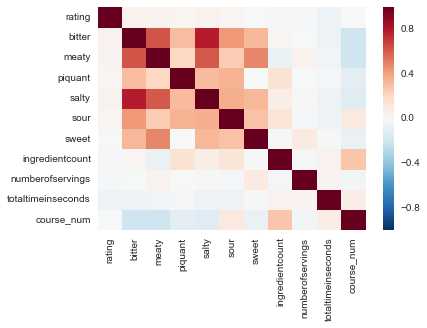

In [274]:
%matplotlib inline
import seaborn as sns
sns.heatmap(train_main.corr())

rating :
NormaltestResult(statistic=4.6621175620571567, pvalue=0.097192786714217452)


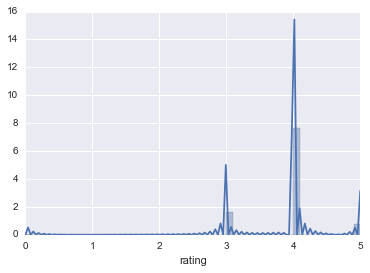


bitter :
NormaltestResult(statistic=28.817775121648708, pvalue=5.5245847716879847e-07)


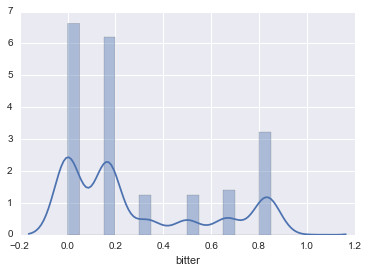


meaty :
NormaltestResult(statistic=11.518510189229978, pvalue=0.0031534597529107662)


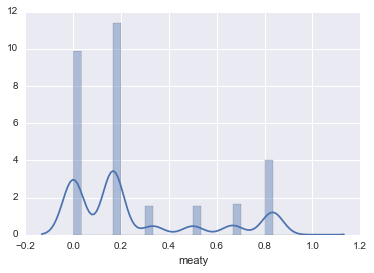


piquant :
NormaltestResult(statistic=32.952810647963155, pvalue=6.9885662445008875e-08)


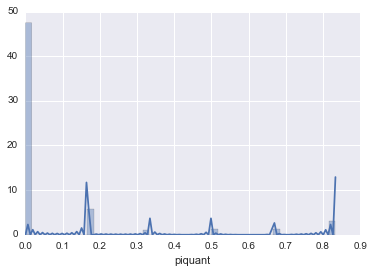


salty :
NormaltestResult(statistic=24.849104707008312, pvalue=4.0186989439394318e-06)


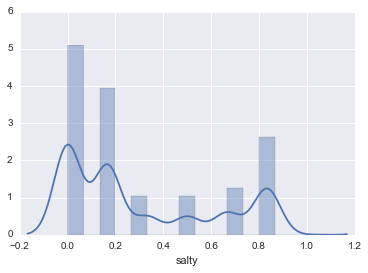


sour :
NormaltestResult(statistic=36.956911921950045, pvalue=9.4386208772342319e-09)


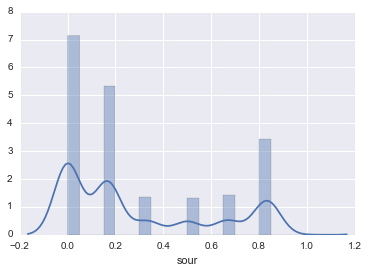


sweet :
NormaltestResult(statistic=8.7005529565989264, pvalue=0.012903244620140661)


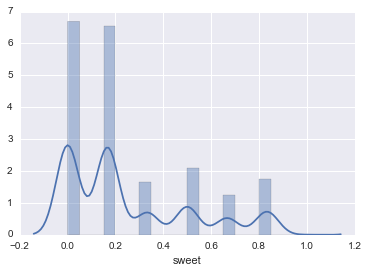


ingredientcount :
NormaltestResult(statistic=45.469642589548783, pvalue=1.3378042294130825e-10)


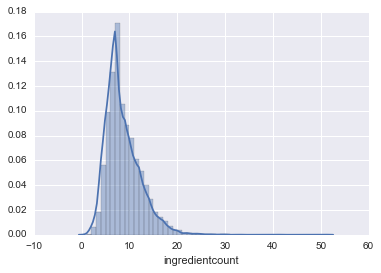


numberofservings :
NormaltestResult(statistic=58.417390941308966, pvalue=2.0645468067179108e-13)


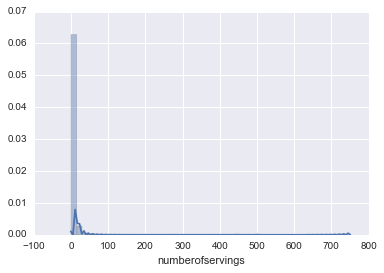


totaltimeinseconds :
NormaltestResult(statistic=62.451455439373518, pvalue=2.7468741219298912e-14)


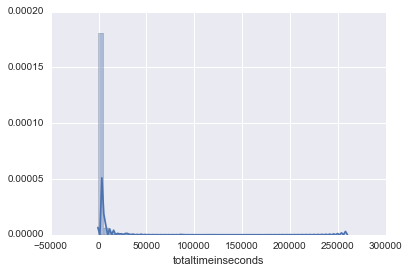


course_num :
NormaltestResult(statistic=16.26904751221484, pvalue=0.00029323865564473233)


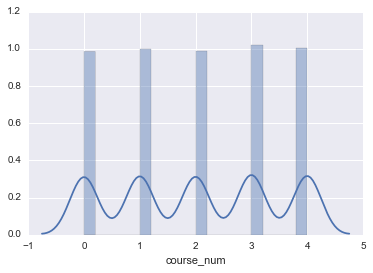

In [275]:
# check for normal distribution
for i in train_main:
   rand_sample = train_main[i].sample(50, random_state=6)
   print i,':\n', scipy.stats.mstats.normaltest(rand_sample)
   sns.distplot(train_main[i])
   plt.xlabel(i)
   plt.show()
   print

In [276]:
train.head(2)

,rating,bitter,meaty,piquant,salty,sour,sweet,ingredientcount,numberofservings,totaltimeinseconds,...,yolks,yoplait,york,yukon,za,zest,zesty,ziti,zucchini,course_num
0,4,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,5,1.0,900.0,...,0.0,0.354794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,4,0.833333,0.833333,0.0,0.833333,0.166667,0.166667,5,12.0,300.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [278]:
df_train = train.drop(['rating','bitter','meaty','piquant','salty','sour','sweet', 'numberofservings','totaltimeinseconds'], axis = 1)

In [291]:
df_test = test.drop(['rating','bitter','meaty','piquant','salty','sour','sweet', 'numberofservings','totaltimeinseconds'], axis = 1)

In [279]:
df_train.head(2)

,ingredientcount,00,10,100,95,aai,accent,achiote,acid,acorn,...,yolks,yoplait,york,yukon,za,zest,zesty,ziti,zucchini,course_num
0,5,0.0,0.0,0.399201,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.354794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,5,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [294]:
df_test.head(2)

,ingredientcount,00,10,100,95,aai,accent,achiote,acid,acorn,...,yolks,yoplait,york,yukon,za,zest,zesty,ziti,zucchini,course_num
0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [530]:
array = df_train.values
x = array[:, 0:1829]
y = array[:, 1829]
_array = df_test.values
x_t = _array[:, 0:1829]
y_t = _array[:, 1829]

In [532]:
#grid search
from sklearn.grid_search import GridSearchCV


alphas = np.array([0.1, 1.0,10.0,100.0,1000.0])
param_grid = dict(C=alphas)
model = LogisticRegression()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x,y)
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.870614912632
LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
{'C': 10.0}


In [299]:
y_pred = grid.predict(x_t)
print y_pred.shape

print classification_report(y_t, y_pred)

(1242,)
             precision    recall  f1-score   support

        0.0       0.88      0.81      0.85       283
        1.0       0.81      0.84      0.83       254
        2.0       0.88      0.89      0.89       254
        3.0       0.82      0.92      0.86       205
        4.0       0.97      0.92      0.94       246

avg / total       0.87      0.87      0.87      1242



In [313]:
# add cuisine as column
BB_cuis = pd.read_csv('~/Desktop/Yummly/BB/BB_cuis.csv')
APP_cuis = pd.read_csv('~/Desktop/Yummly/APPETIZER/APP_cuis.csv')
DS_cuis = pd.read_csv('~/Desktop/Yummly/DESSERT/DS_cuis.csv')
SP_cuis = pd.read_csv('~/Desktop/Yummly/SOUP/SP_cuis.csv')
SLD_cuis = pd.read_csv('~/Desktop/Yummly/SALAD/SLD_cuis.csv')

In [314]:
print BB_cuis.shape
print APP_cuis.shape
print DS_cuis.shape
print SP_cuis.shape
print SLD_cuis.shape


(1999, 27)
(2000, 27)
(1999, 27)
(1998, 27)
(2000, 27)


In [316]:
BB_cuis.head(2)

,id,American,Asian,Barbecue,Cajun & Creole,Chinese,Cuban,English,French,German,...,Kid-Friendly,Mediterranean,Mexican,Moroccan,Portuguese,Southern & Soul Food,Southwestern,Spanish,Swedish,Thai
0,2--Minute-Low-Carb-English-Muffin-1697908,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2-Ingredient-Pancakes-1686555,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [317]:
BB_cuis['course_num'] = 1
APP_cuis['course_num'] = 0
DS_cuis['course_num'] = 2
SP_cuis['course_num'] = 4
SLD_cuis['course_num'] = 3

In [319]:
cuis = pd.concat([APP_cuis, BB_cuis, DS_cuis, SLD_cuis, SP_cuis], axis = 0)
cuis.shape

(9996, 28)

In [336]:
from sklearn import cross_validation
array = cuis.values
X = array[:, 1:27].astype(int)
print X.shape
Y = array[:, 27].astype(int)
print Y.shape

X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, random_state=10)

print X_train.shape
print X_test.shape

(9996, 26)
(9996,)
(7497, 26)
(2499, 26)


In [337]:
#grid search
from sklearn.grid_search import GridSearchCV


alphas = np.array([0.1, 1.0,10.0,100.0,1000.0])
param_grid = dict(C=alphas)
model = LogisticRegression()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X_train,Y_train)
print(grid.best_score_)
print(grid.best_estimator_)

0.260104041617
LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


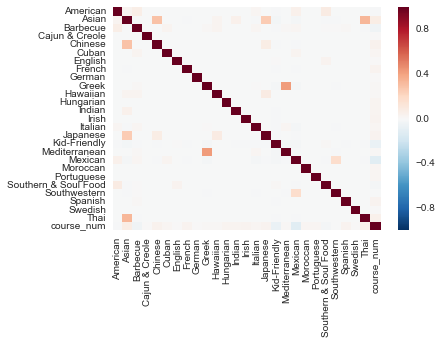

In [339]:
sns.heatmap(cuis.corr())

In [344]:
#merge cuisine dataframe with others

pd.merge(cuis, df_train, on= 'id', how='left')

KeyError: 'id'

In [354]:
test.head()

,rating,bitter,meaty,piquant,salty,sour,sweet,ingredientcount,numberofservings,totaltimeinseconds,...,yolks,yoplait,york,yukon,za,zest,zesty,ziti,zucchini,course_num
0,4,0.833333,0.166667,0.166667,0.833333,0.500000,0.166667,7,4.0,2700.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,4.0,1500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,12.0,1500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,4,0.166667,0.333333,0.000000,0.500000,0.166667,0.333333,7,8.0,1500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,4.0,2700.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
